# Data Classification

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moharamfatema/data-classification-ml-python/blob/main/classification.ipynb)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

In [3]:
url='https://drive.google.com/file/d/1Y2-FuthGBfCqKUhCyWTIt0w8danWx6vm/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [4]:
df.columns = ['fLength',
              'fWidth',
              'fSize',
              'fConc',
              'fConc1', 
              'fAsym',
              'fM3Long',
              'fM3Trans',
              'fAlpha',
              'fDist',
              'classified']
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,classified
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [5]:
print(df['classified'].value_counts())
df.describe()

g    12331
h     6688
Name: classified, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000
mean,53.251440,22.181291,2.825026,0.380326,0.214658,-4.333429,10.544942,0.250170,27.645052,193.823912
std,42.365598,18.346484,0.472609,0.182818,0.110514,59.207163,51.001391,20.827896,26.104151,74.729344
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863700,2.477100,0.235800,0.128450,-20.588300,-12.845050,-10.849750,5.546950,142.499000
50%,37.149000,17.140600,2.739600,0.354100,0.196500,4.011900,15.309400,0.689800,17.677000,191.856900
75%,70.126850,24.739950,3.101600,0.503700,0.285250,24.060350,35.844100,10.947050,45.884100,240.564550
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [6]:
df = df.groupby('classified')
df = df.apply(lambda x: x.sample(df.size().min()).reset_index(drop=True))
df['classified'].value_counts()

g    6688
h    6688
Name: classified, dtype: int64

In [7]:
test = df.sample(frac=0.3)
train = df.copy().drop(test.index)

print('train samples =', train.shape[0],
      '\ntest samples =', test.shape[0],
      '\ntotal =', train.shape[0] + test.shape[0])

new_idx = [t[1] for t in test.index]
test = test.set_index(pd.Series(new_idx))

train samples = 9363 
test samples = 4013 
total = 13376


In [8]:
Y = train['classified']
X = train.drop('classified', axis=1)

In [9]:
x_test = test.copy()
y_test = x_test.pop('classified')
y_test.value_counts()

h    2014
g    1999
Name: classified, dtype: int64

In [10]:
print(Y.value_counts()/(df['classified'].shape))
print(y_test.value_counts()/(df['classified'].shape))

g    0.350553
h    0.349432
Name: classified, dtype: float64
h    0.150568
g    0.149447
Name: classified, dtype: float64


In [ ]:
def cross_validation(estimator, X, y):
    scoring = ['precision_macro',
               'recall_macro',
               'f1_macro',
               'accuracy']
    
    # docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

    scores = cross_validate(estimator, X, y, scoring=scoring, n_jobs=-1, return_estimator=True,return_train_score=True,error_score='raise')
    # print (scores)
    # plt.figure(figsize=(30, 20))
    # plt.rcParams['font.size'] = '30'
    # plt.plot(scores['test_precision_macro'], label='precision')
    # plt.plot(scores['test_recall_macro'], label='recall')
    # plt.plot(scores['test_f1_macro'], label='F1 score')
    # plt.plot(scores['test_accuracy'], label='accuracy')
    # plt.legend()
    # plt.show()
    

    # for i, est in enumerate(scores['estimator']):
    #     predictions = est.predict(X)
    #     labels = est.classes_
    #     cm = confusion_matrix(y, predictions, labels=labels)
    #     disp = ConfusionMatrixDisplay(confusion_matrix=cm,
    #                                   display_labels=labels)
    #     # disp.plot()
        

    return scores
    

In [ ]:
ACCURACY = "test_accuracy"
PRECISION = "test_precision_macro"
RECALL = "test_recall_macro"
F1 = "test_f1_macro"

def avg(arr):
    return sum(arr)/len(arr)

def disp_avg_scores(scores):
    print("Average scores:\n")
    print(f"Accuracy = {avg(scores[ACCURACY])}")
    print(f"Precision = {avg(scores[PRECISION])}")
    print(f"Recall = {avg(scores[RECALL])}")
    print(f"F1 score = {avg(scores[F1])}")



In [ ]:
decision_tree = DecisionTreeClassifier()
estimators =  cross_validation(decision_tree, X, Y)
disp_avg_scores(estimators)

Average scores:

Accuracy = 0.7877812686808949
Precision = 0.7878185165560619
Recall = 0.7877757399925465
F1 score = 0.7877717478059679


In [11]:
DISPLAY_LABELS = ['g','h']
POS_LABEL = 'g'

def disp_scores(y_true,y_pred,pos_label = POS_LABEL,display_labels = DISPLAY_LABELS):
    ConfusionMatrixDisplay( confusion_matrix(y_true,y_pred),display_labels=display_labels).plot()
    print("Accuracy =",accuracy_score(y_true,y_pred))
    print("Precision =",precision_score(y_true,y_pred,pos_label=pos_label))
    print("Recall =",recall_score(y_true,y_pred,pos_label=pos_label))
    print("F1 =",f1_score(y_true,y_pred,pos_label=pos_label))


Scores on the test set :
Accuracy = 0.7886867680039871
Precision = 0.7869094488188977
Recall = 0.7939424031777557
F1 = 0.7904102817597628


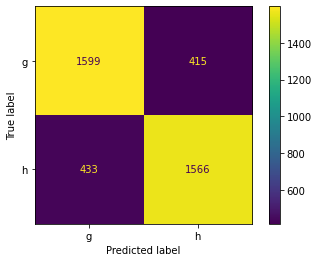

In [ ]:
# scores of estimator on test set
decision_tree.fit(X,Y)
y_pred = decision_tree.predict(x_test)
print("Scores on the test set :")
disp_scores(y_test,y_pred)


In [12]:
# no of samples = 13376 samples

# choose an n, cross validate and store avg
METRIC_KEYS = ["accuracy","precision","recall","f1"]

def avg_scores_arr(scores):
    return {"accuracy":avg(scores[ACCURACY]),"precision": avg(scores[PRECISION]),"recall":avg(scores[RECALL]),"f1":avg(scores[F1])}

In [13]:
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

new_idx = [t[1] for t in train.index]
train = train.set_index(pd.Series(new_idx))

x_train = train.copy()
y_train = x_train.pop('classified')
y_train.value_counts()

g    4689
h    4674
Name: classified, dtype: int64

In [14]:
def k_folds(features_train, labels_train, model_fit, model_pred):
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(skf.split(features_train, labels_train)):
        x_train = features_train[train_idx]
        y_train = labels_train[train_idx]
        x_val = features_train[val_idx]
        y_val = labels_train[val_idx]
        model_fit(x_train,y_train)
        y_pred = model_pred(x_val)
        avg_accuracy = (avg_accuracy + accuracy_score(y_val, y_pred)) / 2
    return avg_accuracy

## AdaBoost

### Parameters:
- n_estimators

1. define range of estimators: max: no of samples -- too many
2. for each n, cross validate and save the average metrics
3. choose the n with the heighrst average
4. test the best estimator against test dataframe.

n = 10, accuracy = 78.22 %, time = 4.98 s.
n = 60, accuracy = 80.89 %, time = 16.78 s.
n = 110, accuracy = 82.09 %, time = 25.29 s.
n = 160, accuracy = 81.86 %, time = 36.11 s.
n = 210, accuracy = 83.39 %, time = 49.37 s.
n = 260, accuracy = 81.99 %, time = 58.39 s.
n = 310, accuracy = 82.86 %, time = 69.25 s.
n = 360, accuracy = 80.05 %, time = 80.75 s.
n = 410, accuracy = 82.37 %, time = 91.62 s.
n = 460, accuracy = 82.32000000000001 %, time = 103.39 s.
n = 510, accuracy = 81.64 %, time = 114.91 s.
max accuracy = 83.39 % at n = 210


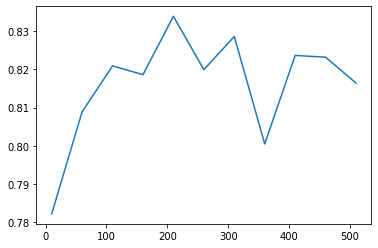

In [15]:
# grate search
# n_estimators in range (10,510,100)

n_estimators_arr = range(10,511,50)
accuracy_array = [0 for _ in range(len(n_estimators_arr))]

for i , n_estimators in enumerate(n_estimators_arr):
    ada_boost = AdaBoostClassifier(n_estimators=n_estimators)
    fit = ada_boost.fit
    pred = ada_boost.predict
    time = perf_counter()
    acc = k_folds(x_train.values,y_train.values,fit,pred)
    time = perf_counter() - time
    accuracy_array[i] = acc
    print(f"n = {n_estimators}, accuracy = {round(acc,4)*100} %, time = {round(time,2)} s.")

max_acc = max(accuracy_array)
max_idx = accuracy_array.index(max_acc)

print(f"max accuracy = {round(max_acc,4) * 100} % at n = {n_estimators_arr[max_idx]}")
plt.plot(n_estimators_arr, accuracy_array)
plt.show()


n = 150, accuracy = 82.16 %, time = 34.33 s.
n = 160, accuracy = 83.15 %, time = 36.57 s.
n = 170, accuracy = 82.41000000000001 %, time = 39.14 s.
n = 180, accuracy = 82.80999999999999 %, time = 41.04 s.
n = 190, accuracy = 81.64 %, time = 43.35 s.
n = 200, accuracy = 82.24000000000001 %, time = 47.05 s.
n = 210, accuracy = 82.13000000000001 %, time = 48.24 s.
n = 220, accuracy = 80.7 %, time = 50.3 s.
n = 230, accuracy = 83.05 %, time = 51.83 s.
n = 240, accuracy = 83.17999999999999 %, time = 54.86 s.
n = 250, accuracy = 81.26 %, time = 57.25 s.
max accuracy = 83.17999999999999 % at n = 240


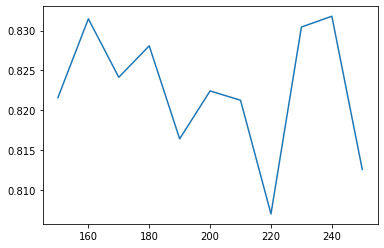

In [17]:
# grate search
# n_estimators in range (150,250,10)

n_estimators_arr = range(150,251,10)
accuracy_array = [0 for _ in range(len(n_estimators_arr))]

for i , n_estimators in enumerate(n_estimators_arr):
    ada_boost = AdaBoostClassifier(n_estimators=n_estimators)
    fit = ada_boost.fit
    pred = ada_boost.predict
    time = perf_counter()
    acc = k_folds(x_train.values,y_train.values,fit,pred)
    time = perf_counter() - time
    accuracy_array[i] = acc
    print(f"n = {n_estimators}, accuracy = {round(acc,4)*100} %, time = {round(time,2)} s.")

max_acc = max(accuracy_array)
max_idx = accuracy_array.index(max_acc)

print(f"max accuracy = {round(max_acc,4) * 100} % at n = {n_estimators_arr[max_idx]}")
plt.plot(n_estimators_arr, accuracy_array)
plt.show()

In [26]:
n_estimators_arr = list(range(150,171,5)) + list(range(230,251,5))
accuracy_array = [0 for _ in range(len(n_estimators_arr))]
n_estimators_arr

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4]

n = 150, accuracy = 82.50999999999999 %, time = 61.69 s.
n = 155, accuracy = 81.96 %, time = 36.96 s.
n = 160, accuracy = 82.71 %, time = 37.07 s.
n = 165, accuracy = 81.67999999999999 %, time = 39.56 s.
n = 170, accuracy = 82.12 %, time = 40.24 s.
n = 230, accuracy = 82.0 %, time = 53.9 s.
n = 235, accuracy = 83.04 %, time = 52.81 s.
n = 240, accuracy = 82.25 %, time = 54.42 s.
n = 245, accuracy = 82.19999999999999 %, time = 55.48 s.
n = 250, accuracy = 82.24000000000001 %, time = 57.11 s.
max accuracy = 83.04 % at n = 235


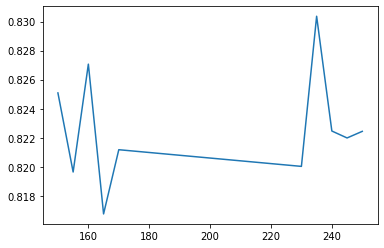

In [27]:
# grate search
# n_estimators in range (150,170,5) + (230,250,5)

n_estimators_arr = list(range(150,171,5)) + list(range(230,251,5))
accuracy_array = [0 for _ in range(len(n_estimators_arr))]

for i , n_estimators in enumerate(n_estimators_arr):
    ada_boost = AdaBoostClassifier(n_estimators=n_estimators)
    fit = ada_boost.fit
    pred = ada_boost.predict
    time = perf_counter()
    acc = k_folds(x_train.values,y_train.values,fit,pred)
    time = perf_counter() - time
    accuracy_array[i] = acc
    print(f"n = {n_estimators}, accuracy = {round(acc,4)*100} %, time = {round(time,2)} s.")

max_acc = max(accuracy_array)
max_idx = accuracy_array.index(max_acc)

print(f"max accuracy = {round(max_acc,4) * 100} % at n = {n_estimators_arr[max_idx]}")
plt.plot(n_estimators_arr, accuracy_array)
plt.show()

Accuracy = 0.8198355345128333
Precision = 0.8149062191510366
Recall = 0.8259129564782391
F1 = 0.8203726708074536


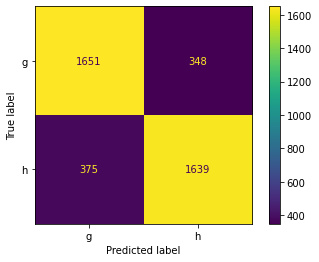

In [30]:
ada_boost = AdaBoostClassifier(n_estimators = 235)
# TODO: execute only after tuning n_estimators
ada_boost.fit(x_train,y_train)
y_pred_ada_boost = ada_boost.predict(x_test)
disp_scores(y_test,y_pred_ada_boost)

## KNN CClassifier

Parameters: k

k = 1, accuracy = 74.53999999999999 %, time = 1.27 s.
k = 5, accuracy = 77.16 %, time = 1.15 s.
k = 9, accuracy = 76.84 %, time = 0.77 s.
k = 13, accuracy = 75.92999999999999 %, time = 0.9 s.
k = 17, accuracy = 76.62 %, time = 0.9 s.
k = 21, accuracy = 77.69 %, time = 0.88 s.
k = 25, accuracy = 77.94 %, time = 0.89 s.
k = 29, accuracy = 76.55999999999999 %, time = 0.91 s.
k = 33, accuracy = 76.5 %, time = 0.95 s.
k = 37, accuracy = 77.75999999999999 %, time = 0.96 s.
k = 41, accuracy = 77.47 %, time = 1.02 s.
k = 45, accuracy = 76.34 %, time = 0.99 s.
k = 49, accuracy = 75.37 %, time = 1.02 s.
k = 53, accuracy = 76.23 %, time = 1.09 s.
k = 57, accuracy = 76.72 %, time = 1.05 s.
k = 61, accuracy = 74.49 %, time = 1.1 s.
k = 65, accuracy = 77.03 %, time = 1.09 s.
k = 69, accuracy = 76.11 %, time = 1.12 s.
k = 73, accuracy = 76.07000000000001 %, time = 1.14 s.
k = 77, accuracy = 76.05 %, time = 1.17 s.
k = 81, accuracy = 75.09 %, time = 1.17 s.
k = 85, accuracy = 74.39 %, time = 1.23 s.
k

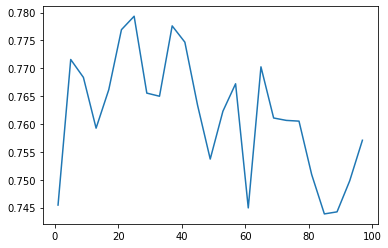

In [33]:
# k in range (1,100,4)

k_arr = range(1,101,4)
accuracy_array = [0 for _ in range(len(k_arr))]

for i , k in enumerate(k_arr):
    knn = KNeighborsClassifier(n_neighbors=k)
    fit = knn.fit
    pred = knn.predict
    time = perf_counter()
    acc = k_folds(x_train.values,y_train.values,fit,pred)
    time = perf_counter() - time
    accuracy_array[i] = acc
    print(f"k = {k}, accuracy = {round(acc,4)*100} %, time = {round(time,2)} s.")

max_acc = max(accuracy_array)
max_idx = accuracy_array.index(max_acc)

print(f"max accuracy = {round(max_acc,4) * 100} % at n = {k_arr[max_idx]}")
plt.plot(k_arr, accuracy_array)
plt.show()


k = 15, accuracy = 77.29 %, time = 1.53 s.
k = 16, accuracy = 76.38000000000001 %, time = 1.28 s.
k = 17, accuracy = 76.63 %, time = 1.43 s.
k = 18, accuracy = 76.06 %, time = 0.83 s.
k = 19, accuracy = 75.79 %, time = 0.89 s.
k = 20, accuracy = 76.19 %, time = 0.86 s.
k = 21, accuracy = 76.14 %, time = 0.89 s.
k = 22, accuracy = 75.97 %, time = 0.89 s.
k = 23, accuracy = 76.37 %, time = 0.94 s.
k = 24, accuracy = 76.2 %, time = 0.9 s.
k = 25, accuracy = 76.77000000000001 %, time = 0.89 s.
k = 26, accuracy = 75.9 %, time = 0.9 s.
k = 27, accuracy = 76.7 %, time = 0.92 s.
k = 28, accuracy = 76.2 %, time = 0.93 s.
k = 29, accuracy = 74.72 %, time = 0.92 s.
k = 30, accuracy = 77.28 %, time = 0.92 s.
k = 31, accuracy = 76.92999999999999 %, time = 0.97 s.
k = 32, accuracy = 76.97 %, time = 1.02 s.
k = 33, accuracy = 76.96 %, time = 1.04 s.
k = 34, accuracy = 76.14999999999999 %, time = 0.97 s.
k = 35, accuracy = 77.99000000000001 %, time = 1.0 s.
k = 36, accuracy = 76.32 %, time = 0.97 s.
k

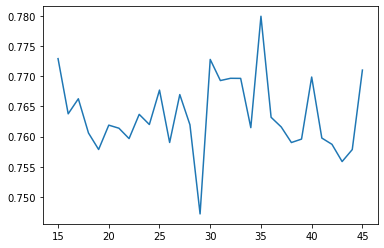

In [34]:
# k in range (15,45)

k_arr = range(15,46)
accuracy_array = [0 for _ in range(len(k_arr))]

for i , k in enumerate(k_arr):
    knn = KNeighborsClassifier(n_neighbors=k)
    fit = knn.fit
    pred = knn.predict
    time = perf_counter()
    acc = k_folds(x_train.values,y_train.values,fit,pred)
    time = perf_counter() - time
    accuracy_array[i] = acc
    print(f"k = {k}, accuracy = {round(acc,4)*100} %, time = {round(time,2)} s.")

max_acc = max(accuracy_array)
max_idx = accuracy_array.index(max_acc)

print(f"max accuracy = {round(max_acc,4) * 100} % at n = {k_arr[max_idx]}")
plt.plot(k_arr, accuracy_array)
plt.show()

Accuracy = 0.7630201844006977
Precision = 0.714227309893704
Recall = 0.8739369684842421
F1 = 0.7860517435320585


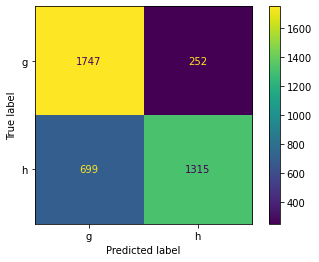

In [35]:
# TODO: execute only after tuning n_neighbours

knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X,Y)
y_pred_knn = knn.predict(x_test)
disp_scores(y_test,y_pred_knn)

## Random Forest
Parameters: n_estimators

n = 10, accuracy = 85.27 %, time = 2.61 s.
n = 60, accuracy = 85.26 %, time = 14.9 s.
n = 110, accuracy = 85.82 %, time = 27.21 s.
n = 160, accuracy = 85.22 %, time = 39.59 s.
n = 210, accuracy = 85.72 %, time = 53.24 s.
n = 260, accuracy = 86.27 %, time = 65.13 s.
n = 310, accuracy = 85.42999999999999 %, time = 77.48 s.
n = 360, accuracy = 84.98 %, time = 89.12 s.
n = 410, accuracy = 86.52 %, time = 101.7 s.
n = 460, accuracy = 86.14 %, time = 118.04 s.
n = 510, accuracy = 85.92999999999999 %, time = 126.39 s.
max accuracy = 86.52 % at n = 410


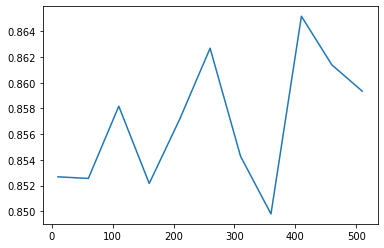

In [36]:
# n in range (10,510,50)

n_arr = range(10,511,50)
accuracy_array = [0 for _ in range(len(n_arr))]

for i , n_estimators in enumerate(n_arr):
    random_forest = RandomForestClassifier(n_estimators=n_estimators)
    fit =  random_forest.fit
    pred = random_forest.predict
    time = perf_counter()
    acc = k_folds(x_train.values,y_train.values,fit,pred)
    time = perf_counter() - time
    accuracy_array[i] = acc
    print(f"n = {n_estimators}, accuracy = {round(acc,4)*100} %, time = {round(time,2)} s.")

max_acc = max(accuracy_array)
max_idx = accuracy_array.index(max_acc)

print(f"max accuracy = {round(max_acc,4) * 100} % at n = {n_arr[max_idx]}")
plt.plot(n_arr, accuracy_array)
plt.show()

n = 350, accuracy = 86.2 %, time = 87.37 s.
n = 370, accuracy = 86.58 %, time = 94.3 s.
n = 390, accuracy = 86.17 %, time = 98.38 s.
n = 410, accuracy = 85.46000000000001 %, time = 102.52 s.
n = 430, accuracy = 86.22999999999999 %, time = 107.23 s.
n = 450, accuracy = 86.32 %, time = 111.83 s.
n = 470, accuracy = 84.88 %, time = 116.79 s.
n = 490, accuracy = 85.09 %, time = 121.39 s.
max accuracy = 86.58 % at n = 370


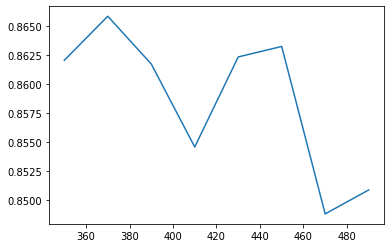

In [37]:
# n in range (350,490,20)

n_arr = range(350,491,20)
accuracy_array = [0 for _ in range(len(n_arr))]

for i , n_estimators in enumerate(n_arr):
    random_forest = RandomForestClassifier(n_estimators=n_estimators)
    fit =  random_forest.fit
    pred = random_forest.predict
    time = perf_counter()
    acc = k_folds(x_train.values,y_train.values,fit,pred)
    time = perf_counter() - time
    accuracy_array[i] = acc
    print(f"n = {n_estimators}, accuracy = {round(acc,4)*100} %, time = {round(time,2)} s.")

max_acc = max(accuracy_array)
max_idx = accuracy_array.index(max_acc)

print(f"max accuracy = {round(max_acc,4) * 100} % at n = {n_arr[max_idx]}")
plt.plot(n_arr, accuracy_array)
plt.show()

Accuracy = 0.8557189135310241
Precision = 0.8387404580152672
Recall = 0.87943971985993
F1 = 0.8586080586080587


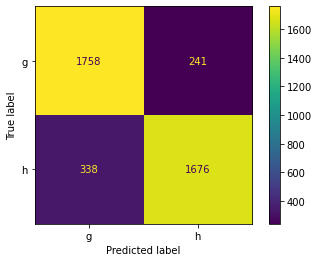

In [40]:
random_forest = RandomForestClassifier(n_estimators = 370)
random_forest.fit(X,Y)
y_pred = random_forest.predict(x_test)
disp_scores(y_test,y_pred)

## Naïve Bayes

In [ ]:
# no of samples = 13376 samples

naive_bayes = GaussianNB()
naive_bayes.fit(X,Y)    

GaussianNB()

Accuracy = 0.6463992025915773
Precision = 0.6032482598607889
Recall = 0.89128305582762
F1 = 0.7195097845423997


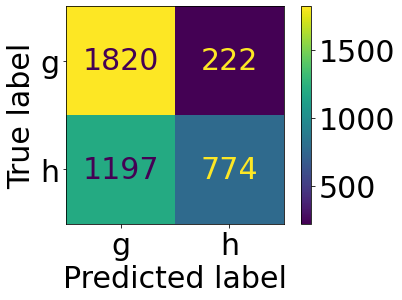

In [ ]:
# TODO: execute only after tuning n_neighbours

y_pred_nb = naive_bayes.predict(x_test)
disp_scores(y_test,y_pred_nb)

## Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler


df_scaled = df.copy()

new_idx = [t[1] for t in df_scaled.index]
df_scaled = df_scaled.set_index(pd.Series(new_idx))
all_y = df_scaled.pop("classified")

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled,all_y) )
df_scaled.columns = df.columns.delete(-1)
df_scaled.insert(len(df_scaled.columns),"classified",all_y.values)

print(df_scaled.describe())

            fLength        fWidth         fSize         fConc        fConc1  \
count  13376.000000  13376.000000  13376.000000  13376.000000  13376.000000   
mean       0.160771      0.092437      0.266159      0.415631      0.317799   
std        0.142590      0.081717      0.140942      0.209555      0.166259   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.062008      0.045853      0.164267      0.250455      0.188029   
50%        0.103748      0.066764      0.240183      0.388055      0.291896   
75%        0.218209      0.101941      0.348174      0.558615      0.424224   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  
count  13376.000000  13376.000000  13376.000000  13376.000000  13376.000000  
mean       0.436070      0.595252      0.534507      0.348940      0.392091  
std        0.063512      0.099014      0.060326      0

In [ ]:
test_scaled = df_scaled.sample(frac=0.3)
train_scaled = df_scaled.copy().drop(test_scaled.index)

print('train samples =', train_scaled.shape[0],
      '\ntest samples =', test_scaled.shape[0],
      '\ntotal =', train_scaled.shape[0] + test_scaled.shape[0])

x_test_scaled = test_scaled.copy()
y_test_scaled = x_test_scaled.pop("classified")


x_train_scaled = train_scaled.copy()
y_train_scaled = x_train_scaled.pop("classified")

train samples = 9363 
test samples = 4013 
total = 13376


Accuracy = 0.6449040617991527
Precision = 0.5975447909754479
Recall = 0.8946845504222554
F1 = 0.7165307340362045


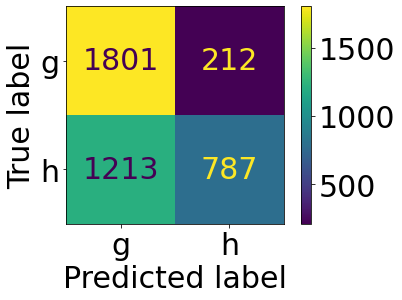

In [ ]:
# NAive bayes with scaled data
# no of samples = 13376 samples

naive_bayes_scaled = GaussianNB()
naive_bayes_scaled.fit(x_train_scaled,y_train_scaled)    

# TODO: execute only after tuning n_neighbours

y_pred_nb_scaled = naive_bayes_scaled.predict(x_test_scaled)
disp_scores(y_test_scaled,y_pred_nb_scaled)